In [1]:
%cd /mnt/nas/minici/SocialAIGym/src

/mnt/nas/minici/SocialAIGym/src


In [2]:
from data_component import DataComponent
from information_diffusion_component import BoundedConfidenceDiffusionComponent


In [3]:
# synthetic data generator params
num_nodes = 100
modularity = 0.5
homophily = 0.5

# bounded confidence model params
epsilon = 0.2
mu = 0.5


In [4]:
data = DataComponent(num_nodes, modularity, homophily)
data.pre_compute_neighboring()  # save neighbors for each node
information_diffusion_model = BoundedConfidenceDiffusionComponent(data_component=data, epsilon=epsilon, mu=mu)


---

Opinions stats 
mean: 0.48325300641018826
std: 0.27262642506384815
min: 0.021606133482870115
max: 0.999443729594417


Text(0, 0.5, 'occurrences')

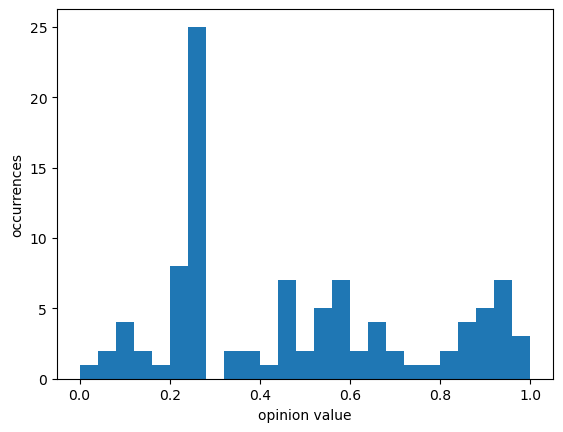

In [5]:
# print some basic statistics
opinions = information_diffusion_model.get_opinions()
print(f'Opinions stats \nmean: {opinions.mean()}\nstd: {opinions.std()}\nmin: {opinions.min()}\nmax: {opinions.max()}')

import matplotlib.pyplot as plt
_ = plt.hist(opinions, bins=25, range=[0,1])
plt.xlabel('opinion value')
plt.ylabel('occurrences')


---

In [18]:
# try to propagate some message
llm_node_id = 0
message_value = 0.5

opinion_shift_tot, num_activated_users, _ = information_diffusion_model.propagate_message(message=message_value,
                                                                                          node_id=llm_node_id)


In [19]:
opinion_shift_tot

-0.04288858838508042

In [20]:
num_activated_users

29

Opinions stats 
mean: 0.47681971815242624
std: 0.26665895454341526
min: 0.021606133482870115
max: 0.999443729594417


Text(0, 0.5, 'occurrences')

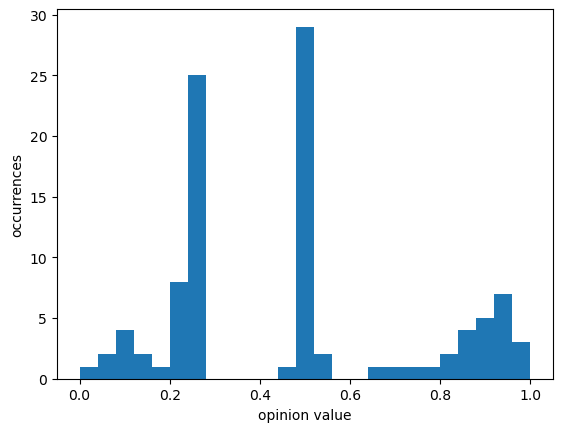

In [21]:
# print some basic statistics
opinions = information_diffusion_model.get_opinions()
print(f'Opinions stats \nmean: {opinions.mean()}\nstd: {opinions.std()}\nmin: {opinions.min()}\nmax: {opinions.max()}')

import matplotlib.pyplot as plt
_ = plt.hist(opinions, bins=25, range=[0,1])
plt.xlabel('opinion value')
plt.ylabel('occurrences')
